In [1]:
import pandas as pd
#import pandas.io.data as iod
from pandas_datareader import data
#Also import numpy and matplotlib. Because ....
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mp
import datetime as dt


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.vq import kmeans2
import operator

def kmeans_getcluster(locs,num):
    x, y = kmeans2(locs, num, iter = 10)  
    plt.scatter(locs[:,0], locs[:,1], c=y*0.75);
    
    plt.show()
    ###calculate the number of points in each cluster
    dict_clusters={}
    all_clusters_index=list(range(num))
    for key in all_clusters_index:
        dict_clusters[key]=0   #initialization

    cluster_label=y.tolist()   #convert numpy to list
    for i in cluster_label:
        dict_clusters[i]+=1

    ###convert dict into 2 dim list in order to sort clusters by the number of points in cluster.
    cluster_list=list()
    for key in all_clusters_index:
        cluster_list.append([key,dict_clusters[key]])


    cluster_list.sort(key=operator.itemgetter(1),reverse=True)
    print(cluster_list)
    
    ###calculate the list storing all locations grouped by each cluster(sorted by num of points)
    j=0
    cluster=list()
    center=list()
    #center[0]=list()
    
    x_list=x.tolist()
    while j<num:   ###for initialization of list cluster
        cluster.append(np.empty([1, 2]))
        j+=1

    j=0
    while j<num:
        k=0

        while k<len(cluster_label):
            if cluster_label[k]==cluster_list[j][0]:
                cluster[j]=np.append(cluster[j],[locs[k]],axis=0)
            k+=1
        

        cluster[j]=np.delete(cluster[j],0,axis=0)   ##delete the initialized empty row

        ###calculate the list storing the center grouped by each cluster(sorted by num of points)
        center.append(x_list[cluster_list[j][0]])
        j+=1
    
    return center,y,cluster_list,cluster

/Users/Sirius/anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:6: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


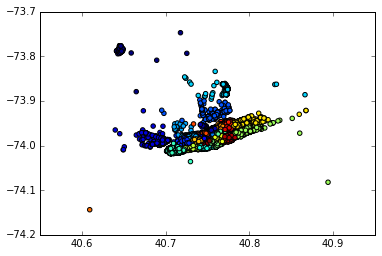

[[12, 5109], [3, 4690], [24, 3778], [17, 3444], [15, 2487], [4, 2176], [20, 2173], [10, 2148], [11, 2123], [22, 2047], [18, 1975], [21, 1764], [14, 1685], [1, 1630], [16, 1558], [23, 1415], [6, 1331], [7, 1292], [13, 1083], [9, 1010], [8, 609], [2, 438], [5, 297], [0, 136], [19, 1]]
[array([[ 40.75691   , -73.989805  ],
       [ 40.755965  , -73.991105  ],
       [ 40.758232  , -73.99286   ],
       ..., 
       [ 40.75420761, -73.99430847],
       [ 40.75608444, -73.99025726],
       [ 40.7537117 , -73.98885345]]), array([[ 40.743968  , -73.979436  ],
       [ 40.744825  , -73.979492  ],
       [ 40.744679  , -73.979056  ],
       ..., 
       [ 40.74626541, -73.98215485],
       [ 40.74707031, -73.98509979],
       [ 40.7462616 , -73.98394775]]), array([[ 40.74987   , -73.991402  ],
       [ 40.748235  , -73.988604  ],
       [ 40.749944  , -73.991069  ],
       ..., 
       [ 40.75092316, -73.99401855],
       [ 40.75021362, -73.99446869],
       [ 40.75233459, -73.98958588]]), arra

In [3]:
data_frame = pd.read_csv('jp_dropoff_timed_cut.csv')   ###can change file name here to process data for different banks 
numpyMatrix = data_frame[[' pickup_latitude',' pickup_longitude']].as_matrix()

###delete 0 (errors) in the numpy array
tnum = numpyMatrix[numpyMatrix!=0]   
locations0 = tnum.reshape([(int(len(tnum))/2),2])



###iteration0
num_cluster0=25

###centers0 is sorted list. centers of clusters
###lables0 is numpy array. cluster labels of each locations
###cluster_list0 is sorted 2 dimension list. [[24,2676],[cluster lable,num of points in the cluster],[],....]
###clusters0 is list of numpy array. each element of list is a numpy array storing all points in the cluster
#centers0,cluster_list0,clusters0 are all in descending orders of number of points in the cluster
centers0,labels0,cluster_list0,clusters0=kmeans_getcluster(locations0,num_cluster0)
print(clusters0)

In [ ]:
gty = [[] for i in range(10)]
gty

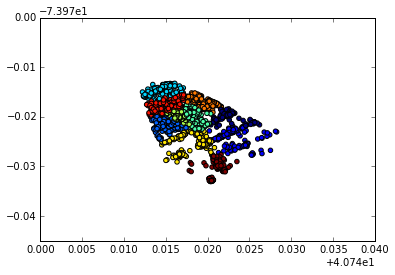

[[5, 2219], [2, 1021], [4, 308], [6, 291], [7, 285], [8, 232], [9, 223], [3, 210], [1, 183], [0, 137]]


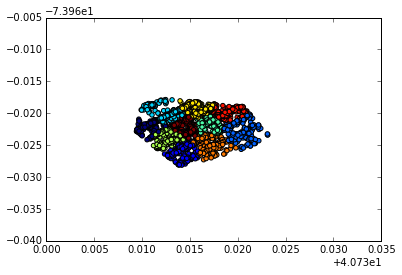

[[6, 707], [9, 611], [3, 578], [8, 523], [5, 486], [0, 412], [1, 395], [4, 391], [7, 329], [2, 258]]


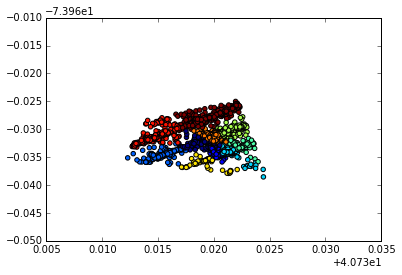

[[7, 986], [3, 656], [9, 473], [5, 381], [8, 359], [1, 317], [2, 242], [0, 180], [4, 125], [6, 59]]


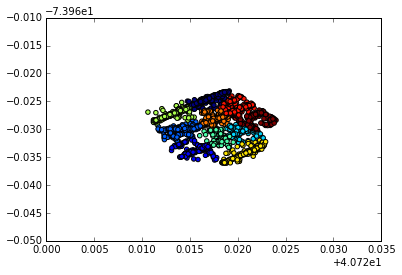

[[8, 596], [0, 544], [7, 496], [5, 377], [2, 375], [1, 281], [6, 280], [9, 194], [4, 159], [3, 142]]


/Users/Sirius/anaconda/lib/python3.4/site-packages/scipy/cluster/vq.py:648: UserWarning: One of the clusters is empty. Re-run kmean with a different initialization.
  warnings.warn("One of the clusters is empty. "


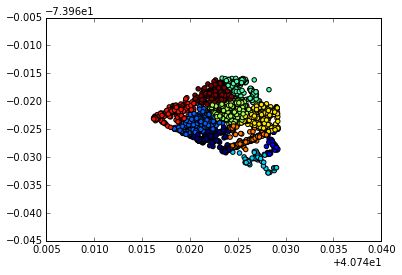

[[2, 480], [5, 443], [6, 308], [7, 302], [0, 221], [9, 215], [4, 199], [8, 191], [3, 75], [1, 53]]


In [4]:
###Iteration1


num_cluster1=10
#initialize list of cluster_return1
###cluster_return is the list storing the four return of the function
cluster_return1 = [[]  for i in range(5)]


i=0
while i<5:
    if clusters0[i].any():  ###if not null
        cluster_return1[i]=kmeans_getcluster(clusters0[i],num_cluster1)
        i+=1

#while i<num_cluster1:
    #cluster1[i]=list()


In [5]:
x = [[] for i in range(25)]
count = 0
for i in range(5):
    for j in range(5):
        x[count] = cluster_return1[i][0][j]
        count = count + 1


In [6]:
x

[[40.756535632055005, -73.99010946607952],
 [40.75562739553374, -73.99116094255635],
 [40.75832307957793, -73.98985857045454],
 [40.75807166388318, -73.99561478144328],
 [40.75995853599999, -73.98725635442104],
 [40.745937456874124, -73.97924841148513],
 [40.744769198036, -73.98223577301137],
 [40.74243402188582, -73.97998964647061],
 [40.7486315045889, -73.9801651873231],
 [40.742805763950635, -73.98396397534978],
 [40.749985398326615, -73.99145264947252],
 [40.751248742256074, -73.99417429759144],
 [40.749278930655386, -73.98806214374208],
 [40.7513474375853, -73.9904300960105],
 [40.74476988272978, -73.99126441963787],
 [40.73974275785234, -73.98647782098999],
 [40.73695063329046, -73.98469767136024],
 [40.73759470582665, -73.98816961074596],
 [40.733312769867375, -73.98720627652526],
 [40.73412219135999, -73.9901691261867],
 [40.76084554885411, -73.98388292558339],
 [40.76406968611739, -73.98154787151239],
 [40.76769729500002, -73.98297784490258],
 [40.7659982491391, -73.9866902363

In [ ]:
###Iteration2

num_cluster2=5
#centers2,labels2,cluster_list2,clusters2=kmeans_getcluster(clusters1_0[0],num_cluster2)
cluster_return2_1=[[[] for j in range(10)] for i in range(25)]
#print(cluster_return1[0][3][0])
count = 0
for i in range(25) :
    for j in range(10):
        cluster_return2_1[i][j]=kmeans_getcluster(cluster_return1[i][3][j],num_cluster2)
